# **Studi Kasus Apache Spark**

| Nama   | NRP |
| -------- | ------- |
| Nathan Kho Pancras  | 5027231002    |
| Michael Kenneth Salim | 5027231002     |

## **Import Library dan Download Dataset**

In [31]:
import kagglehub, os, subprocess
import pyspark
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pyspark.sql import SparkSession

path = kagglehub.dataset_download("sudalairajkumar/cryptocurrencypricehistory")

print("Path to dataset files:", path)

print('JAVA_HOME:', os.environ.get('JAVA_HOME'))
print(subprocess.getoutput('java -version'))
print('PySpark version:', pyspark.__version__)


Path to dataset files: /kaggle/input/cryptocurrencypricehistory
JAVA_HOME: None
openjdk version "11.0.26" 2025-01-21
OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
PySpark version: 3.5.5


## **Menginisiasi Spark Session**

In [32]:
spark = SparkSession.builder.getOrCreate()

In [33]:
spark

## **Pre-Processing Data**

### Membaca Data

In [34]:
Coins = ["BTC", "ETH", "DOGE", "USD", "Stellar"]

Read_BTC = spark.read.csv(f"{path}/coin_Bitcoin.csv", header=True, inferSchema=True)
Read_ETH = spark.read.csv(f"{path}/coin_Ethereum.csv", header=True, inferSchema=True)
Read_DOGE = spark.read.csv(f"{path}/coin_Dogecoin.csv", header=True, inferSchema=True)
Read_USD = spark.read.csv(f"{path}/coin_USDCoin.csv", header=True, inferSchema=True)
Read_Stellar = spark.read.csv(f"{path}/coin_Stellar.csv", header=True, inferSchema=True)

print("Data has been successfully read")

Data has been successfully read


### Memastikan Kolom Date Bertipe Tanggal dan Data Diurutkan Secara Kronologis

In [35]:
print("Bitcoin Data")
Read_BTC.show(5)

print("Ethereum Data")
Read_ETH.show(5)

print("Dogecoin Data")
Read_DOGE.show(5)

print("USDCoin Data")
Read_USD.show(5)

print("Stellar Data")
Read_Stellar.show(5)

Bitcoin Data
+---+-------+------+-------------------+------------------+------------------+------------------+------------------+------+---------------+
|SNo|   Name|Symbol|               Date|              High|               Low|              Open|             Close|Volume|      Marketcap|
+---+-------+------+-------------------+------------------+------------------+------------------+------------------+------+---------------+
|  1|Bitcoin|   BTC|2013-04-29 23:59:59|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|   0.0| 1.6037688645E9|
|  2|Bitcoin|   BTC|2013-04-30 23:59:59|146.92999267578125| 134.0500030517578|             144.0|             139.0|   0.0|  1.542813125E9|
|  3|Bitcoin|   BTC|2013-05-01 23:59:59|139.88999938964844|107.72000122070312|             139.0|116.98999786376953|   0.0|1.29895459375E9|
|  4|Bitcoin|   BTC|2013-05-02 23:59:59| 125.5999984741211| 92.28189849853516|116.37999725341797|105.20999908447266|   0.0|1.16851749525E9|
|  5|Bi

## **Analisis Tren Harga**

### Memasukkan Data ke dalam Database

In [36]:
Read_BTC.createOrReplaceTempView("BTC")
Read_ETH.createOrReplaceTempView("ETH")
Read_DOGE.createOrReplaceTempView("DOGE")
Read_USD.createOrReplaceTempView("USD")
Read_Stellar.createOrReplaceTempView("Stellar")

### Hitung rata-rata harga penutupan (Close) bulanan untuk setiap kripto.

In [37]:
BTC_monthly_query = """
SELECT
    'Bitcoin' AS Coin,
    SUBSTRING(Date, 1, 7) AS Month,
    AVG(Close) AS Avg_Close
FROM BTC
GROUP BY SUBSTRING(Date, 1, 7)
ORDER BY Month
"""
BTC_monthly = spark.sql(BTC_monthly_query)
print("Bitcoin Monthly Averages:")
BTC_monthly.show(5)

ETH_monthly_query = """
SELECT
    'Ethereum' AS Coin,
    SUBSTRING(Date, 1, 7) AS Month,
    AVG(Close) AS Avg_Close
FROM ETH
GROUP BY SUBSTRING(Date, 1, 7)
ORDER BY Month
"""
ETH_monthly = spark.sql(ETH_monthly_query)
print("Ethereum Monthly Averages:")
ETH_monthly.show(5)

doge_monthly_query = """
SELECT
    'Dogecoin' AS Coin,
    SUBSTRING(Date, 1, 7) AS Month,
    AVG(Close) AS Avg_Close
FROM DOGE
GROUP BY SUBSTRING(Date, 1, 7)
ORDER BY Month
"""
doge_monthly = spark.sql(doge_monthly_query)
print("Dogecoin Monthly Averages:")
doge_monthly.show(5)

USD_monthly_query = """
SELECT
    'USDCoin' AS Coin,
    SUBSTRING(Date, 1, 7) AS Month,
    AVG(Close) AS Avg_Close
FROM USD
GROUP BY SUBSTRING(Date, 1, 7)
ORDER BY Month
"""
USD_monthly = spark.sql(USD_monthly_query)
print("USDCoin Monthly Averages:")
USD_monthly.show(5)

Stellar_monthly_query = """
SELECT
    'Stellar' AS Coin,
    SUBSTRING(Date, 1, 7) AS Month,
    AVG(Close) AS Avg_Close
FROM Stellar
GROUP BY SUBSTRING(Date, 1, 7)
ORDER BY Month
"""
Stellar_monthly = spark.sql(Stellar_monthly_query)
print("Stellar Monthly Averages:")
Stellar_monthly.show()

Bitcoin Monthly Averages:
+-------+-------+------------------+
|   Coin|  Month|         Avg_Close|
+-------+-------+------------------+
|Bitcoin|2013-04| 141.7699966430664|
|Bitcoin|2013-05|119.99274124637726|
|Bitcoin|2013-06|107.76140670776367|
|Bitcoin|2013-07|   90.512206539031|
|Bitcoin|2013-08|113.90548435334236|
+-------+-------+------------------+
only showing top 5 rows

Ethereum Monthly Averages:
+--------+-------+------------------+
|    Coin|  Month|         Avg_Close|
+--------+-------+------------------+
|Ethereum|2015-08| 1.259648747742176|
|Ethereum|2015-09| 0.988966029882431|
|Ethereum|2015-10|0.6611039330882411|
|Ethereum|2015-11|0.9313520669937134|
|Ethereum|2015-12| 0.886259263561618|
+--------+-------+------------------+
only showing top 5 rows

Dogecoin Monthly Averages:
+--------+-------+--------------------+
|    Coin|  Month|           Avg_Close|
+--------+-------+--------------------+
|Dogecoin|2013-12|5.005079392503831E-4|
|Dogecoin|2014-01|8.277584448449254

### Identifikasi Bulan dengan Rata-Rata Harga Penutupan Tertinggi dan Terendah untuk Setiap Kripto

In [38]:
BTC_highest_lowest_query = """
SELECT
    'Bitcoin' AS Coin,
    MAX(Avg_Close) AS Highest_Avg_Close,
    MIN(Avg_Close) AS Lowest_Avg_Close,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close DESC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM BTC
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Highest_Month,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close ASC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM BTC
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Lowest_Month
FROM (
    SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
    FROM BTC
    GROUP BY SUBSTRING(Date, 1, 7)
)
"""
BTC_highest_lowest = spark.sql(BTC_highest_lowest_query)
print("Bitcoin Highest and Lowest Months:")
BTC_highest_lowest.show(truncate=False)

ETH_highest_lowest_query = """
SELECT
    'Ethereum' AS Coin,
    MAX(Avg_Close) AS Highest_Avg_Close,
    MIN(Avg_Close) AS Lowest_Avg_Close,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close DESC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM ETH
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Highest_Month,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close ASC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM ETH
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Lowest_Month
FROM (
    SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
    FROM ETH
    GROUP BY SUBSTRING(Date, 1, 7)
)
"""
ETH_highest_lowest = spark.sql(ETH_highest_lowest_query)
print("Ethereum Highest and Lowest Months:")
ETH_highest_lowest.show(truncate=False)

DOGE_highest_lowest_query = """
SELECT
    'Dogecoin' AS Coin,
    MAX(Avg_Close) AS Highest_Avg_Close,
    MIN(Avg_Close) AS Lowest_Avg_Close,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close DESC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM DOGE
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Highest_Month,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close ASC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM DOGE
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Lowest_Month
FROM (
    SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
    FROM DOGE
    GROUP BY SUBSTRING(Date, 1, 7)
)
"""
DOGE_highest_lowest = spark.sql(DOGE_highest_lowest_query)
print("Dogecoin Highest and Lowest Months:")
DOGE_highest_lowest.show(truncate=False)

USD_highest_lowest_query = """
SELECT
    'USDCoin' AS Coin,
    MAX(Avg_Close) AS Highest_Avg_Close,
    MIN(Avg_Close) AS Lowest_Avg_Close,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close DESC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM USD
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Highest_Month,
    (SELECT Month FROM (
        SELECT Month, Avg_Close,
        RANK() OVER (ORDER BY Avg_Close ASC) as rank
        FROM (
            SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
            FROM USD
            GROUP BY SUBSTRING(Date, 1, 7)
        )
    ) WHERE rank = 1) AS Lowest_Month
FROM (
    SELECT SUBSTRING(Date, 1, 7) AS Month, AVG(Close) AS Avg_Close
    FROM USD
    GROUP BY SUBSTRING(Date, 1, 7)
)
"""
USD_highest_lowest = spark.sql(USD_highest_lowest_query)
print("USDCoin Highest and Lowest Months:")
USD_highest_lowest.show(truncate=False)


Bitcoin Highest and Lowest Months:
+-------+-----------------+----------------+-------------+------------+
|Coin   |Highest_Avg_Close|Lowest_Avg_Close|Highest_Month|Lowest_Month|
+-------+-----------------+----------------+-------------+------------+
|Bitcoin|57206.72022674067|90.512206539031 |2021-04      |2013-07     |
+-------+-----------------+----------------+-------------+------------+

Ethereum Highest and Lowest Months:
+--------+------------------+------------------+-------------+------------+
|Coin    |Highest_Avg_Close |Lowest_Avg_Close  |Highest_Month|Lowest_Month|
+--------+------------------+------------------+-------------+------------+
|Ethereum|3140.7307596877413|0.6611039330882411|2021-05      |2015-10     |
+--------+------------------+------------------+-------------+------------+

Dogecoin Highest and Lowest Months:
+--------+-------------------+---------------------+-------------+------------+
|Coin    |Highest_Avg_Close  |Lowest_Avg_Close     |Highest_Month|Lowes

## **Analisis Volatilitas**

### Harian

In [39]:
BTC_volatility_query = """
SELECT
    Date,
    High - Low AS Daily_Volatility
FROM BTC
ORDER BY Date
"""
BTC_volatility = spark.sql(BTC_volatility_query)
print("Sample of Bitcoin Daily Volatility:")
BTC_volatility.show(5)

ETH_volatility_query = """
SELECT
    Date,
    High - Low AS Daily_Volatility
FROM ETH
ORDER BY Date
"""
ETH_volatility = spark.sql(ETH_volatility_query)
print("Sample of Ethereum Daily Volatility:")
ETH_volatility.show(5)

DOGE_volatility_query = """
SELECT
    Date,
    High - Low AS Daily_Volatility
FROM DOGE
ORDER BY Date
"""
DOGE_volatility = spark.sql(DOGE_volatility_query)
print("Sample of Dogecoin Daily Volatility:")
DOGE_volatility.show(5)

USD_volatility_query = """
SELECT
    Date,
    High - Low AS Daily_Volatility
FROM USD
ORDER BY Date
"""
USD_volatility = spark.sql(USD_volatility_query)
print("Sample of USDCoin Daily Volatility:")
USD_volatility.show(5)

Stellar_volatility_query = """
SELECT
    Date,
    High - Low AS Daily_Volatility
FROM Stellar
ORDER BY Date
"""
Stellar_volatility = spark.sql(Stellar_volatility_query)
print("Sample of Stellar Daily Volatility:")
Stellar_volatility.show(5)

Sample of Bitcoin Daily Volatility:
+-------------------+------------------+
|               Date|  Daily_Volatility|
+-------------------+------------------+
|2013-04-29 23:59:59|13.488006591796875|
|2013-04-30 23:59:59|12.879989624023438|
|2013-05-01 23:59:59| 32.16999816894531|
|2013-05-02 23:59:59| 33.31809997558594|
|2013-05-03 23:59:59|29.027999877929688|
+-------------------+------------------+
only showing top 5 rows

Sample of Ethereum Daily Volatility:
+-------------------+-------------------+
|               Date|   Daily_Volatility|
+-------------------+-------------------+
|2015-08-08 23:59:59|  2.084084987640381|
|2015-08-09 23:59:59|0.25061899423599243|
|2015-08-10 23:59:59| 0.0933079719543457|
|2015-08-11 23:59:59| 0.4681749939918518|
|2015-08-12 23:59:59|0.40633201599121094|
+-------------------+-------------------+
only showing top 5 rows

Sample of Dogecoin Daily Volatility:
+-------------------+--------------------+
|               Date|    Daily_Volatility|
+------

### Bulanan

In [40]:
volatility_queries = {
    'Bitcoin': """
    SELECT
        'Bitcoin' as Coin,
        SUBSTRING(Date, 1, 7) as Month,
        AVG(High - Low) as Avg_Daily_Volatility,
        MAX(High - Low) as Max_Daily_Volatility,
        MIN(High - Low) as Min_Daily_Volatility
    FROM BTC
    GROUP BY SUBSTRING(Date, 1, 7)
    ORDER BY Month
    """,
    'Ethereum': """
    SELECT
        'Ethereum' as Coin,
        SUBSTRING(Date, 1, 7) as Month,
        AVG(High - Low) as Avg_Daily_Volatility,
        MAX(High - Low) as Max_Daily_Volatility,
        MIN(High - Low) as Min_Daily_Volatility
    FROM ETH
    GROUP BY SUBSTRING(Date, 1, 7)
    ORDER BY Month
    """,
    'Dogecoin': """
    SELECT
        'Dogecoin' as Coin,
        SUBSTRING(Date, 1, 7) as Month,
        AVG(High - Low) as Avg_Daily_Volatility,
        MAX(High - Low) as Max_Daily_Volatility,
        MIN(High - Low) as Min_Daily_Volatility
    FROM DOGE
    GROUP BY SUBSTRING(Date, 1, 7)
    ORDER BY Month
    """,
    'USDCoin': """
    SELECT
        'USDCoin' as Coin,
        SUBSTRING(Date, 1, 7) as Month,
        AVG(High - Low) as Avg_Daily_Volatility,
        MAX(High - Low) as Max_Daily_Volatility,
        MIN(High - Low) as Min_Daily_Volatility
    FROM USD
    GROUP BY SUBSTRING(Date, 1, 7)
    ORDER BY Month
    """,
    'Stellar': """
    SELECT
        'Stellar' as Coin,
        SUBSTRING(Date, 1, 7) as Month,
        AVG(High - Low) as Avg_Daily_Volatility,
        MAX(High - Low) as Max_Daily_Volatility,
        MIN(High - Low) as Min_Daily_Volatility
    FROM Stellar
    GROUP BY SUBSTRING(Date, 1, 7)
    ORDER BY Month
    """
}

# Execute queries and store results
volatility_results = {}
for coin, query in volatility_queries.items():
    volatility_results[coin] = spark.sql(query)
    print(f"\n{coin} Monthly Volatility:")
    volatility_results[coin].show(5)


Bitcoin Monthly Volatility:
+-------+-------+--------------------+--------------------+--------------------+
|   Coin|  Month|Avg_Daily_Volatility|Max_Daily_Volatility|Min_Daily_Volatility|
+-------+-------+--------------------+--------------------+--------------------+
|Bitcoin|2013-04|  13.183998107910156|  13.488006591796875|  12.879989624023438|
|Bitcoin|2013-05|    9.69558371267011|   33.31809997558594|  1.7900009155273438|
|Bitcoin|2013-06|   6.697579447428385|   20.48999786376953|  2.4420013427734375|
|Bitcoin|2013-07|   7.149925724152596|  15.833999633789062|  1.4691009521484375|
|Bitcoin|2013-08|   4.613774207330519|  14.760002136230469|                 0.0|
+-------+-------+--------------------+--------------------+--------------------+
only showing top 5 rows


Ethereum Monthly Volatility:
+--------+-------+--------------------+--------------------+--------------------+
|    Coin|  Month|Avg_Daily_Volatility|Max_Daily_Volatility|Min_Daily_Volatility|
+--------+-------+-----

### Kenaikan Per Tahun

In [41]:
yearly_growth_queries = {
    'Bitcoin': """
    SELECT
        'Bitcoin' as Coin,
        SUBSTRING(Date, 1, 4) as Year,
        FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date) as Year_Start,
        LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as Year_End,
        ((LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) -
          FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) /
         FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) * 100 as Growth_Percentage
    FROM BTC
    """,
    'Ethereum': """
    SELECT
        'Ethereum' as Coin,
        SUBSTRING(Date, 1, 4) as Year,
        FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date) as Year_Start,
        LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as Year_End,
        ((LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) -
          FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) /
         FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) * 100 as Growth_Percentage
    FROM ETH
    """,
    'Dogecoin': """
    SELECT
        'Dogecoin' as Coin,
        SUBSTRING(Date, 1, 4) as Year,
        FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date) as Year_Start,
        LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as Year_End,
        ((LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) -
          FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) /
         FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) * 100 as Growth_Percentage
    FROM DOGE
    """,
    'USDCoin': """
    SELECT
        'USDCoin' as Coin,
        SUBSTRING(Date, 1, 4) as Year,
        FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date) as Year_Start,
        LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as Year_End,
        ((LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) -
          FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) /
         FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) * 100 as Growth_Percentage
    FROM USD
    """,
    'Stellar': """
    SELECT
        'Stellar' as Coin,
        SUBSTRING(Date, 1, 4) as Year,
        FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date) as Year_Start,
        LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as Year_End,
        ((LAST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) -
          FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) /
         FIRST_VALUE(Close) OVER (PARTITION BY SUBSTRING(Date, 1, 4) ORDER BY Date)) * 100 as Growth_Percentage
    FROM Stellar
    """
}

# Execute yearly growth queries
yearly_growth_results = {}
for coin, query in yearly_growth_queries.items():
    result = spark.sql(query).distinct()
    yearly_growth_results[coin] = result
    print(f"\n{coin} Yearly Growth:")
    result.show()


Bitcoin Yearly Growth:
+-------+----+-----------------+-----------------+------------------+
|   Coin|Year|       Year_Start|         Year_End| Growth_Percentage|
+-------+----+-----------------+-----------------+------------------+
|Bitcoin|2017|998.3250122070312|  14156.400390625|1318.0151972080678|
|Bitcoin|2014|771.4000244140625|320.1929931640625|-58.49196486514586|
|Bitcoin|2019|    3843.51996727|    7193.59897843| 87.16174339376505|
|Bitcoin|2015|314.2489929199219|430.5669860839844|37.014595363779925|
|Bitcoin|2016|434.3340148925781|963.7429809570312|121.88982394008204|
|Bitcoin|2013|144.5399932861328| 754.010009765625|  421.661854704102|
|Bitcoin|2021|   29374.15188907|   34235.19345116|16.548704386249096|
|Bitcoin|2018| 13657.2001953125|    3742.70033544|-72.59540548637055|
|Bitcoin|2020|    7200.17439274|   29001.71982218|302.79190808798586|
+-------+----+-----------------+-----------------+------------------+


Ethereum Yearly Growth:
+--------+----+------------------+------

## **Perbandingan Antar Kripto**

### Tren Harga

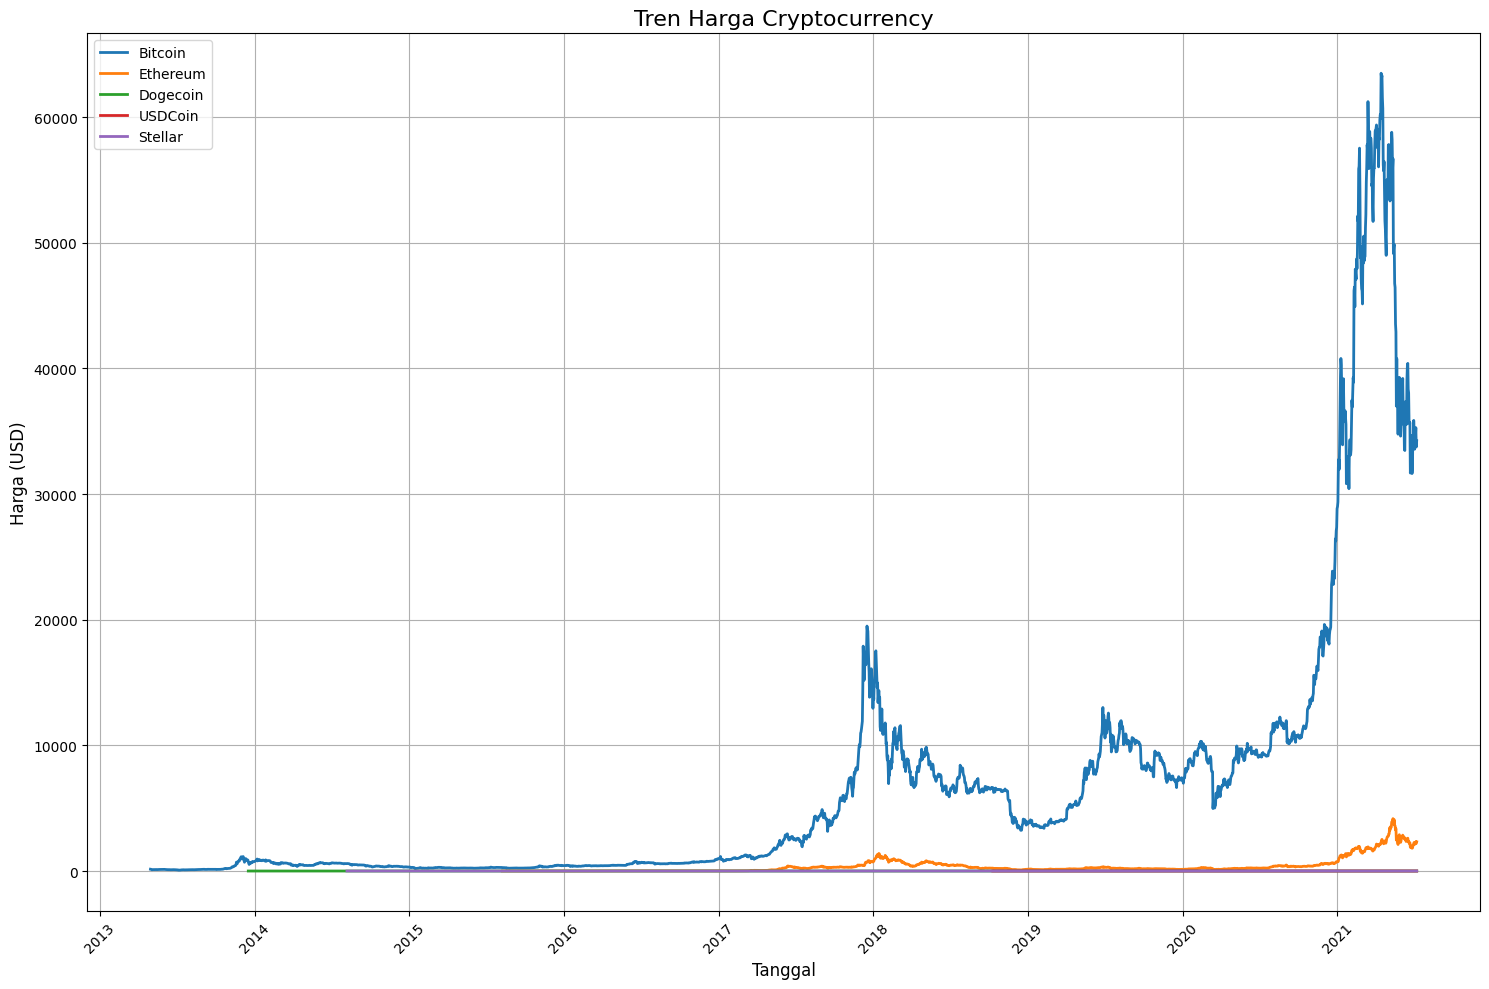

In [42]:
# Define trend queries for each cryptocurrency
trend_queries = {
    'Bitcoin': """
    SELECT Date, Close as Price
    FROM BTC
    ORDER BY Date
    """,
    'Ethereum': """
    SELECT Date, Close as Price
    FROM ETH
    ORDER BY Date
    """,
    'Dogecoin': """
    SELECT Date, Close as Price
    FROM DOGE
    ORDER BY Date
    """,
    'USDCoin': """
    SELECT Date, Close as Price
    FROM USD
    ORDER BY Date
    """,
    'Stellar': """
    SELECT Date, Close as Price
    FROM Stellar
    ORDER BY Date
    """
}

# Create figure for all price trends
plt.figure(figsize=(15, 10))

# Plot each cryptocurrency's price trend
for coin, query in trend_queries.items():
    # Get data from Spark DataFrame and convert to pandas
    df = spark.sql(query).toPandas()
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the trend
    plt.plot(df['Date'], df['Price'], label=coin, linewidth=2)

plt.title('Tren Harga Cryptocurrency', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

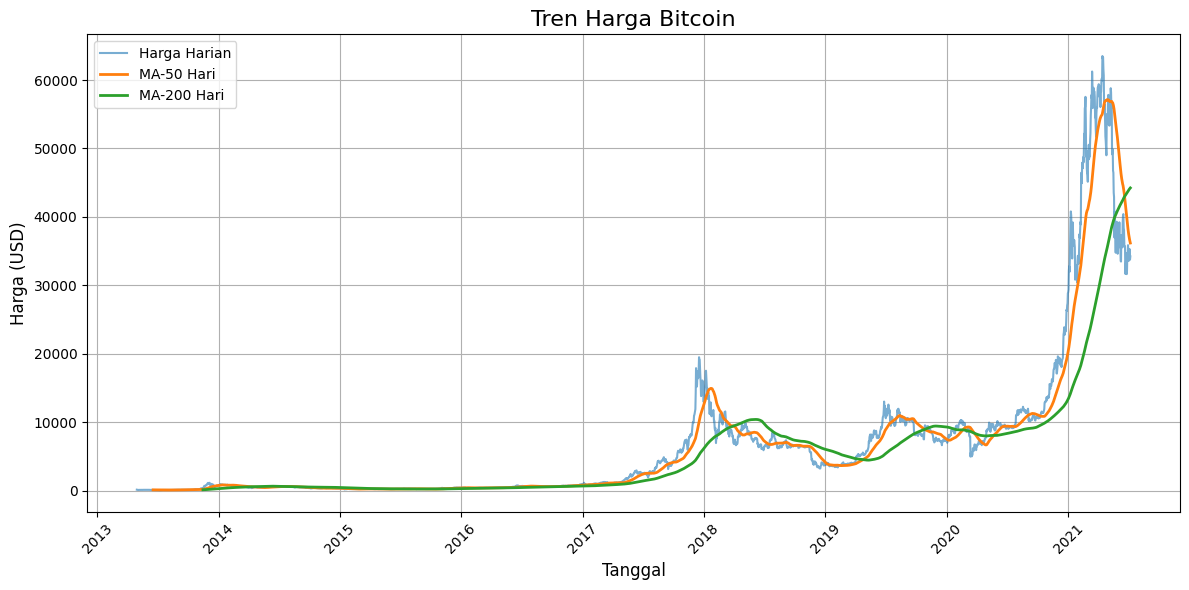


Statistik Bitcoin:
+-----------------+--------------+-----------------+-----------------+
|        Min_Price|     Max_Price|        Avg_Price|     Median_Price|
+-----------------+--------------+-----------------+-----------------+
|68.43099975585938|63503.45793019|6711.290443071496|2286.409912109375|
+-----------------+--------------+-----------------+-----------------+



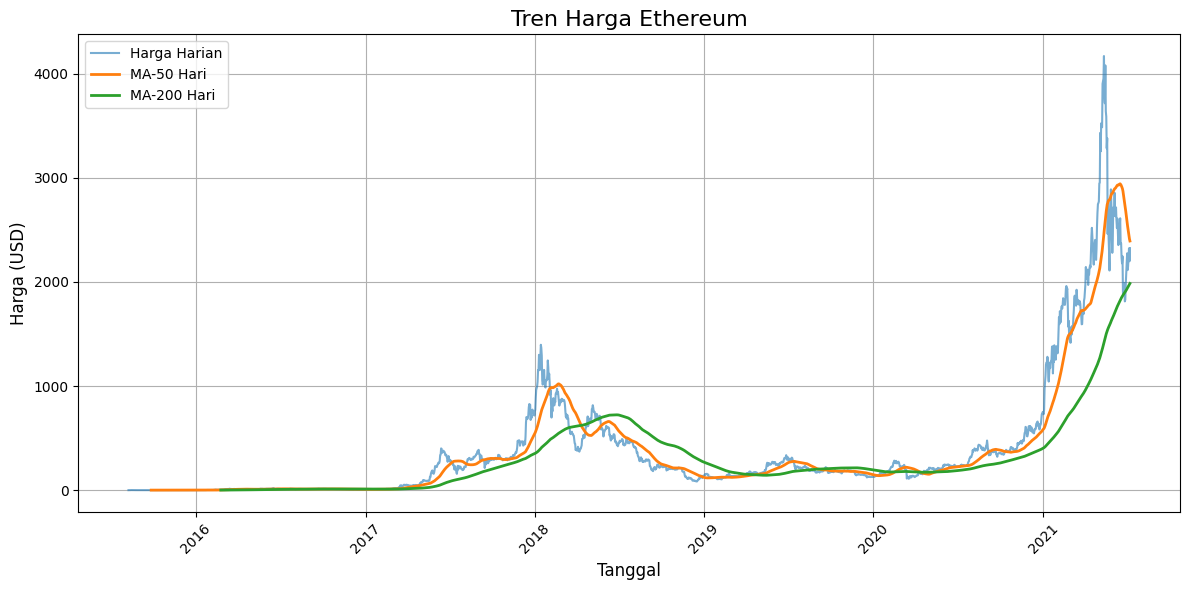


Statistik Ethereum:
+------------------+-------------+-----------------+------------------+
|         Min_Price|    Max_Price|        Avg_Price|      Median_Price|
+------------------+-------------+-----------------+------------------+
|0.4348289966583252|4168.70104865|383.9106913193636|198.64369149700002|
+------------------+-------------+-----------------+------------------+



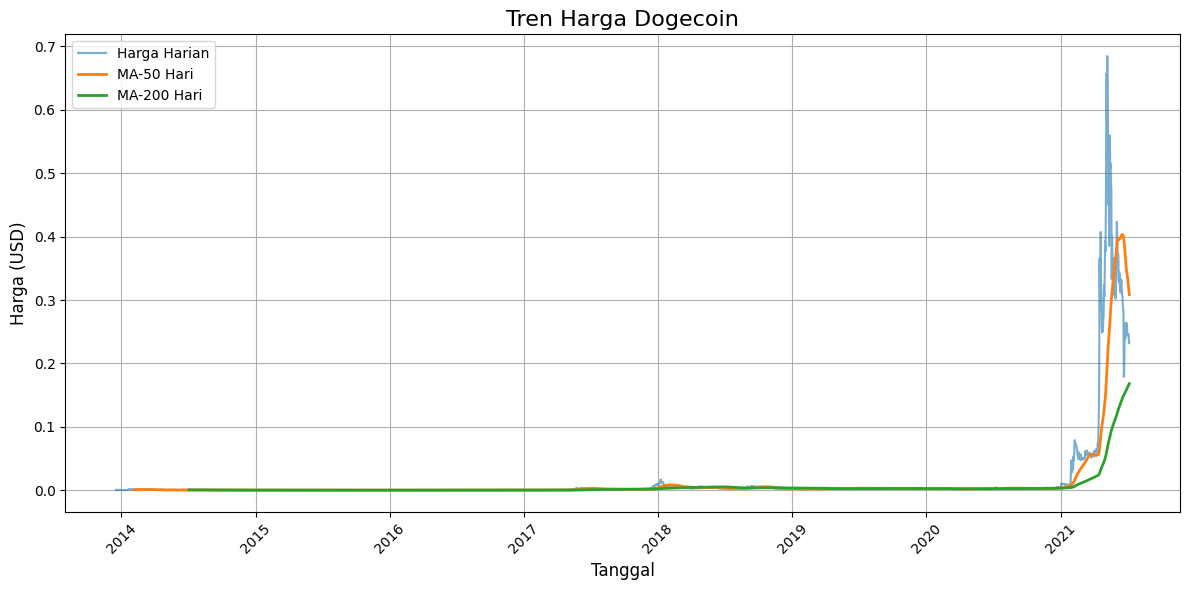


Statistik Dogecoin:
+--------------------+----------+--------------------+--------------------+
|           Min_Price| Max_Price|           Avg_Price|        Median_Price|
+--------------------+----------+--------------------+--------------------+
|8.726520172785968E-5|0.68477698|0.013762639322080631|0.001844350402689...|
+--------------------+----------+--------------------+--------------------+



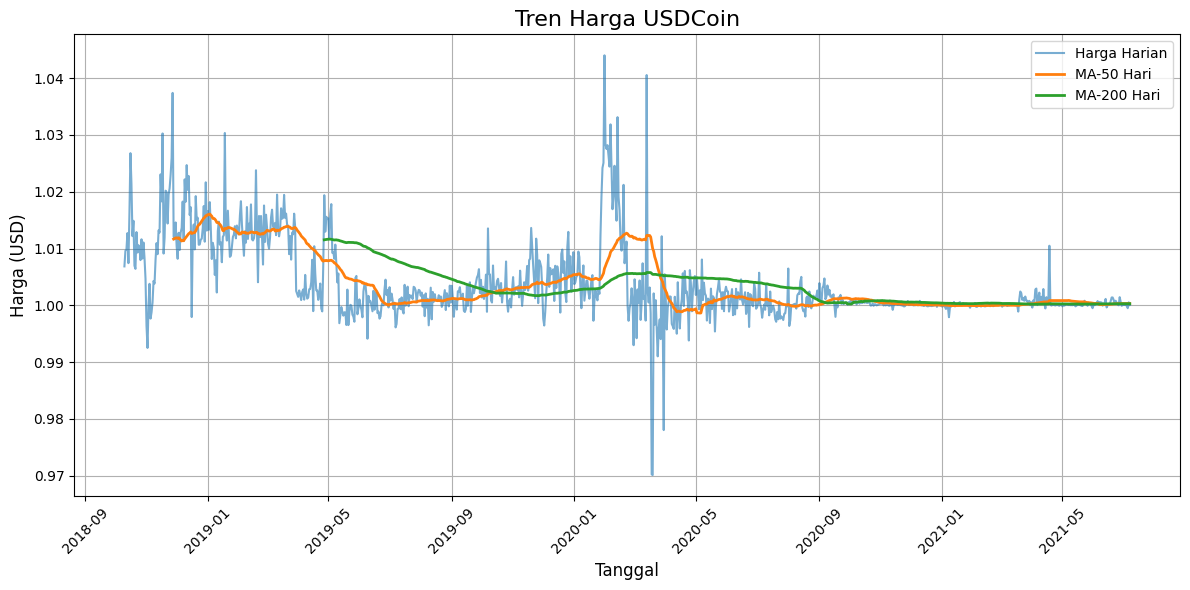


Statistik USDCoin:
+--------------+-------------+------------------+------------+
|     Min_Price|    Max_Price|         Avg_Price|Median_Price|
+--------------+-------------+------------------+------------+
|0.970123943883|1.04402915715|1.0037913488368773|1.0011519746|
+--------------+-------------+------------------+------------+



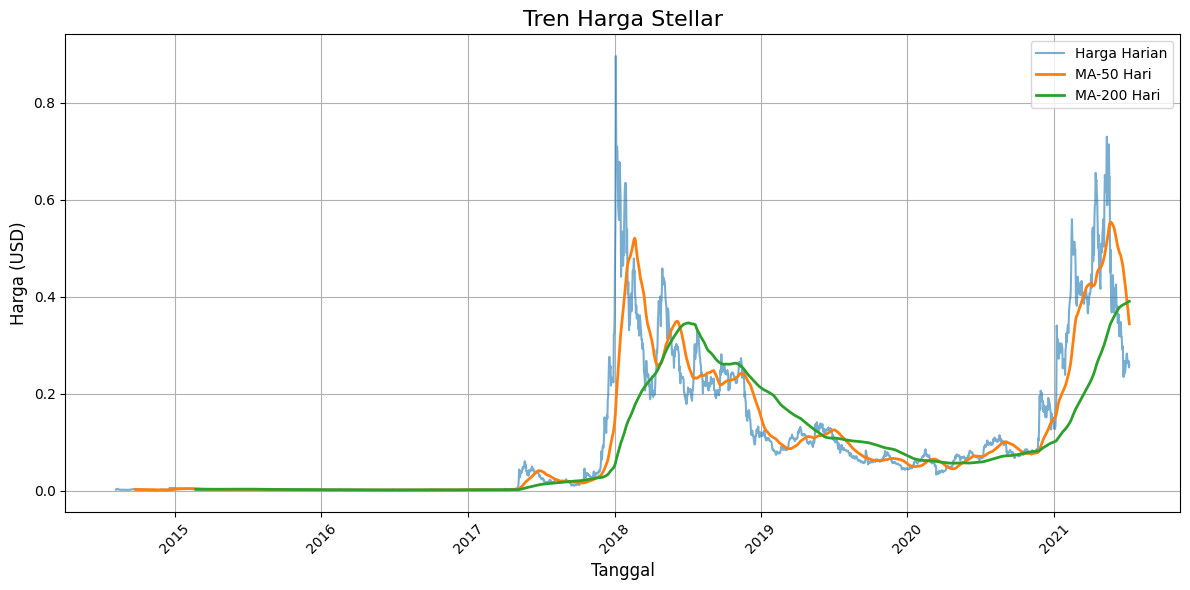


Statistik Stellar:
+--------------------+------------------+-------------------+--------------+
|           Min_Price|         Max_Price|          Avg_Price|  Median_Price|
+--------------------+------------------+-------------------+--------------+
|0.001356599968858...|0.8962270021438599|0.10150907766757886|0.049440950969|
+--------------------+------------------+-------------------+--------------+



In [45]:
# Plot individual trends for better detail
for coin, query in trend_queries.items():
    plt.figure(figsize=(12, 6))

    # Get data
    df = spark.sql(query).toPandas()
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate moving averages
    df['MA50'] = df['Price'].rolling(window=50).mean()
    df['MA200'] = df['Price'].rolling(window=200).mean()

    # Plot price and moving averages
    plt.plot(df['Date'], df['Price'], label='Harga Harian', alpha=0.6)
    plt.plot(df['Date'], df['MA50'], label='MA-50 Hari', linewidth=2)
    plt.plot(df['Date'], df['MA200'], label='MA-200 Hari', linewidth=2)

    plt.title(f'Tren Harga {coin}', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Harga (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nStatistik {coin}:")
    table_name = {
        'Bitcoin': 'BTC',
        'Ethereum': 'ETH',
        'Dogecoin': 'DOGE',
        'USDCoin': 'USD',
        'Stellar': 'Stellar'
    }
    stats_query = f"""
    SELECT
        MIN(Close) as Min_Price,
        MAX(Close) as Max_Price,
        AVG(Close) as Avg_Price,
        PERCENTILE(Close, 0.5) as Median_Price
    FROM {table_name[coin]}
    """
    spark.sql(stats_query).show()

### Volatilitas Tertinggi

In [46]:
# Calculate overall volatility metrics for each cryptocurrency
overall_volatility_queries = {
    'Bitcoin': """
    SELECT
        'Bitcoin' as Coin,
        AVG(High - Low) as Avg_Overall_Volatility,
        MAX(High - Low) as Max_Overall_Volatility,
        STDDEV(High - Low) as Volatility_StdDev
    FROM BTC
    """,
    'Ethereum': """
    SELECT
        'Ethereum' as Coin,
        AVG(High - Low) as Avg_Overall_Volatility,
        MAX(High - Low) as Max_Overall_Volatility,
        STDDEV(High - Low) as Volatility_StdDev
    FROM ETH
    """,
    'Dogecoin': """
    SELECT
        'Dogecoin' as Coin,
        AVG(High - Low) as Avg_Overall_Volatility,
        MAX(High - Low) as Max_Overall_Volatility,
        STDDEV(High - Low) as Volatility_StdDev
    FROM DOGE
    """,
    'USDCoin': """
    SELECT
        'USDCoin' as Coin,
        AVG(High - Low) as Avg_Overall_Volatility,
        MAX(High - Low) as Max_Overall_Volatility,
        STDDEV(High - Low) as Volatility_StdDev
    FROM USD
    """,
    'Stellar': """
    SELECT
        'Stellar' as Coin,
        AVG(High - Low) as Avg_Overall_Volatility,
        MAX(High - Low) as Max_Overall_Volatility,
        STDDEV(High - Low) as Volatility_StdDev
    FROM Stellar
    """
}

# Execute overall volatility queries
overall_volatility_results = {}
for coin, query in overall_volatility_queries.items():
    result = spark.sql(query)
    overall_volatility_results[coin] = result
    print(f"\n{coin} Overall Volatility Metrics:")
    result.show()


Bitcoin Overall Volatility Metrics:
+-------+----------------------+----------------------+-----------------+
|   Coin|Avg_Overall_Volatility|Max_Overall_Volatility|Volatility_StdDev|
+-------+----------------------+----------------------+-----------------+
|Bitcoin|     407.3164998036554|    12864.619572720003|944.4535359593766|
+-------+----------------------+----------------------+-----------------+


Ethereum Overall Volatility Metrics:
+--------+----------------------+----------------------+-----------------+
|    Coin|Avg_Overall_Volatility|Max_Overall_Volatility|Volatility_StdDev|
+--------+----------------------+----------------------+-----------------+
|Ethereum|     32.66597936333834|    1485.4755559300002| 76.5784723659276|
+--------+----------------------+----------------------+-----------------+


Dogecoin Overall Volatility Metrics:
+--------+----------------------+----------------------+-------------------+
|    Coin|Avg_Overall_Volatility|Max_Overall_Volatility|  Volat